<a href="https://colab.research.google.com/github/jyotima96/jyotima/blob/master/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic dataset case study
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.
The data set available to us is the train dataset with details of 891 passengers. 
###Data Features
1.PassengerId- A unique passenger Id

2.Survived- Annotated by 0 and 1 where 0 means not survived, 1 means survived 

3.Pclass-3 classes-1,2,3 where 1 is the highest and 3 is the lowest 		

4.Name- name of the person	

5.Sex- Male or Female	

6.Age- Age of the person

7.SibSp-Number of sibings on board  

8.Parch- Parents on board

9.Ticket- Unique number on the ticket	

10.Fare-	Fare of the ticket

11.Cabin- the cabin allocated to the person	

12.Embarked- if survived or not from which port they got the life boat(if  
survived) not survived(body was recovered from)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

Our dataset had 891 rows and 12 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data types of each column is given and the count of the values present in each Column is also given.

Percentage of null values

In [7]:
(df.isnull().sum()/891)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

As we can see the percentage of null values for Age is 19.8%, Cabin has 77.1% null values, whereas 0.22% null values present in embarked.

#Univariate Exploration

##What is the Count of Survived vs Not Survived?

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The number of people survived are 342 and not survived is 549

##Visualize Survived vs Not Survived

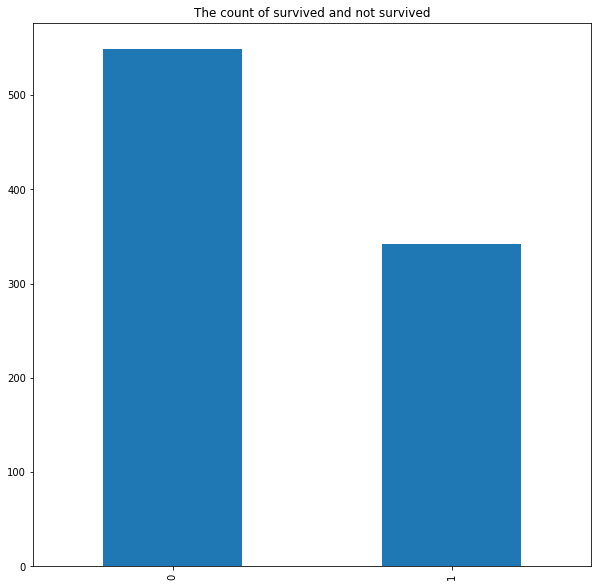

In [9]:
(df.Survived.value_counts()).plot(kind='bar',figsize=(10,10));
plt.title("The count of survived and not survived");

The total number of passengers in the ship were 891 out of them 342 survived that brings the survival rate to be 38.38%, and 549 people did not survived which means that 61.61% people did not survive, there could be various reasons for such a low survival rate, which we will analyse in the later sections.

##Find out the Numerical Columns Basic Statistics

In [10]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wright, Mr. George",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

##Visual EDA for single Categorical Column: "Embarked"

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The total number of passengers is 891. The most number of people were embarked from port S and least number was embarked from port Q.

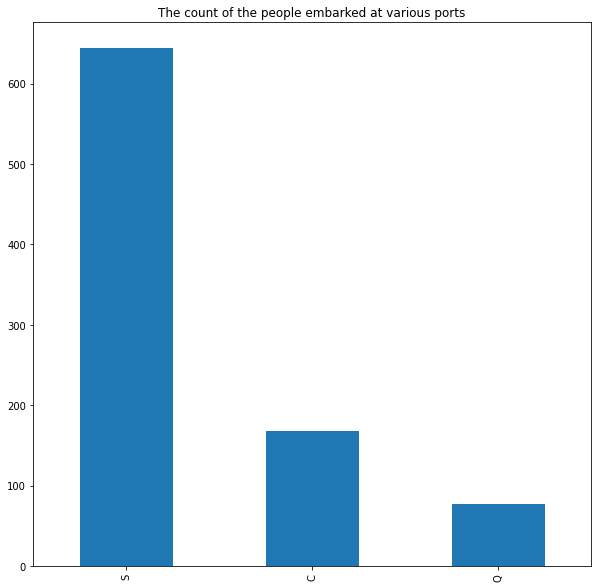

In [12]:
(df.Embarked.value_counts()).plot(kind='bar',figsize=(10,10))
plt.title("The count of the people embarked at various ports");

72% of the people were embarked from port S. Port S seems to be used by the post passengers and port Q by the least.


##Visual EDA for single Continuous Column: "Fare" using Distribution Plot

In [13]:
px.histogram(df, x='Fare',width=800)


As we can see most of the people have bought the ticket of less than INR 100. And for some it shows the fare price to be 0 which indicates that those may be children or or some special discount.

The above graph shows the fare and the count of the people who took the ticket of that cost. Most of the people seem to have bought the ticket of less than INR 100. 838 people out of 891 people(~94%) bought a ticket of less than INR 100.

##Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

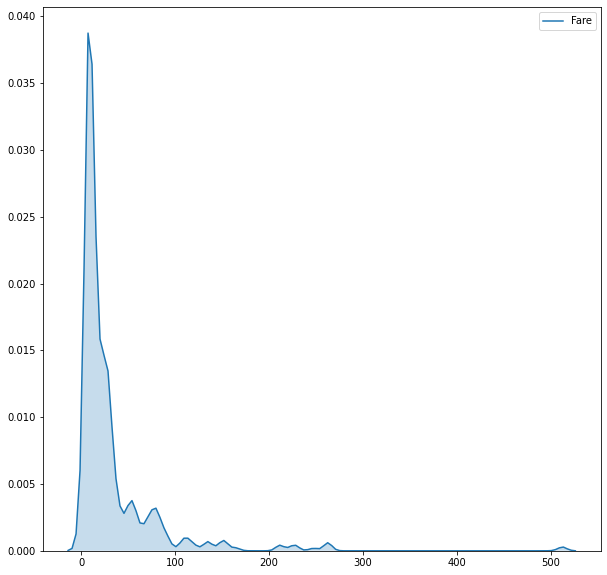

In [14]:
plt.figure(figsize=(10,10))
sns.kdeplot(df['Fare'],shade=True);

Density plot for the Fare.

#Bivariate Exploration

##What is the count of Males and Females Survived and Not Survived in each Class?

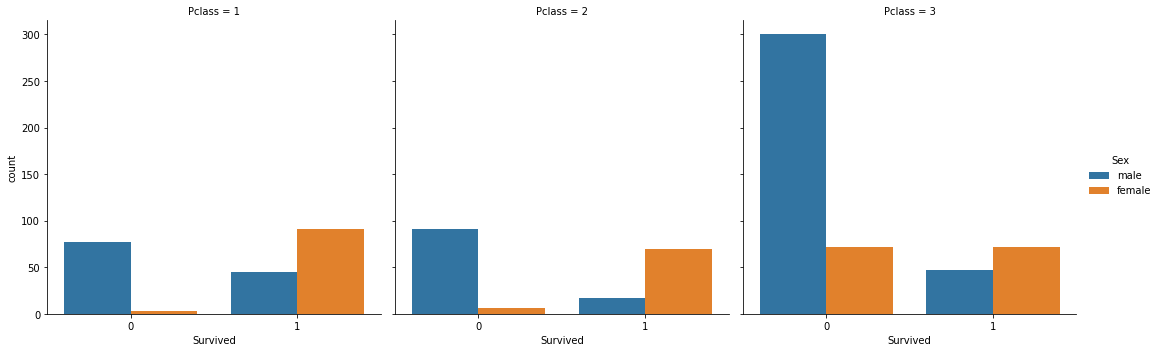

In [15]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count');

The above distribution shows in each class what is the number of male and female survived and not survived. 
In class 1 there are 122 males and 94 females out of these females 91 survived, and out of 122 males only 45 survived.

In class 2 there are 108 male passengers and 76 females out of them 70 females survived and 17 males survived.

In class 3 there are 347 males and 144 females out of which 72 females survived and 47 males survived.

From the above numbers it is clear that the least survival rate was seen in class 3 males that is only 13.54% and maximum msurvival rate was seen in class 1 females which is ~96%. One more inference that we can have about the survival rate is that females in all the classes have a much higher survival rate in comparison to the males.

##Visualize Survived and Not Survived with respect to the 'Embarked' Column:

In [16]:
import folium
m = folium.Map(
    location=[41.732500, -49.946889],
    zoom_start=4,
    tiles='Stamen Terrain',
    width=1500, height=1000
)
#C
folium.Marker(
    location=[49.644577,-1.605079],
    popup='Cherbourg'
).add_to(m)
#Q
folium.Marker(
    location=[51.84914,-8.2975265],
    popup='Queenstown' ,
    icon=folium.Icon(color='red')
).add_to(m)
#S
folium.Marker(
    location=[50.8965, -1.3968],
    popup='Southampton'
).add_to(m)
folium.Marker(
    location=[41.732500, -49.946889],
    popup='Spot where Titanic sank in 1912' ,
    icon=folium.Icon(color='green')
).add_to(m)
m

IN the above map the green mark shows where the titanic sinked down and the red mark shows from where the most people embarked that is port S whereas the other who ports are marked in blue. 

There were 644 people who embarked from port S thus making it the most used and 168 passengers used port C and the least number 77 from port Q.

In [52]:
pd.crosstab(df['Survived'] , df['Embarked'],margins=True)

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


The above table shows the number of people survived and not survived from each port. From Port C 55.3% people survived, from port Q 38.96% survived, from port S 33.69% survived. The below graph shows the same

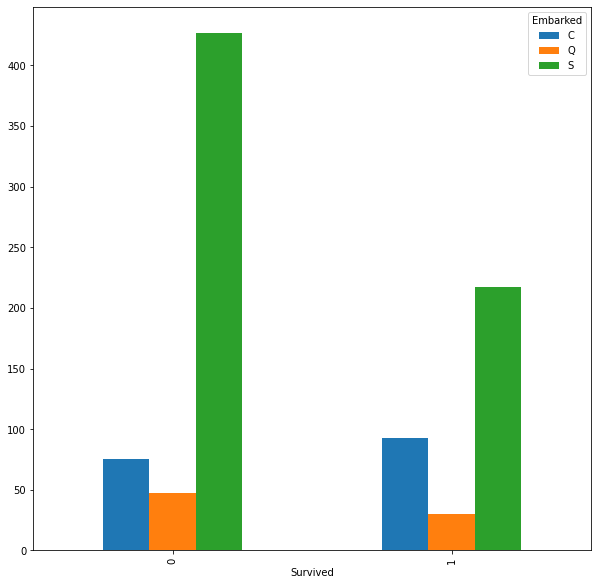

In [18]:
(pd.crosstab(df['Survived'] , df['Embarked'])).plot(kind='bar',figsize=(10,10));

#Plot a Desnity Graph based on Fare and Survival Rate:

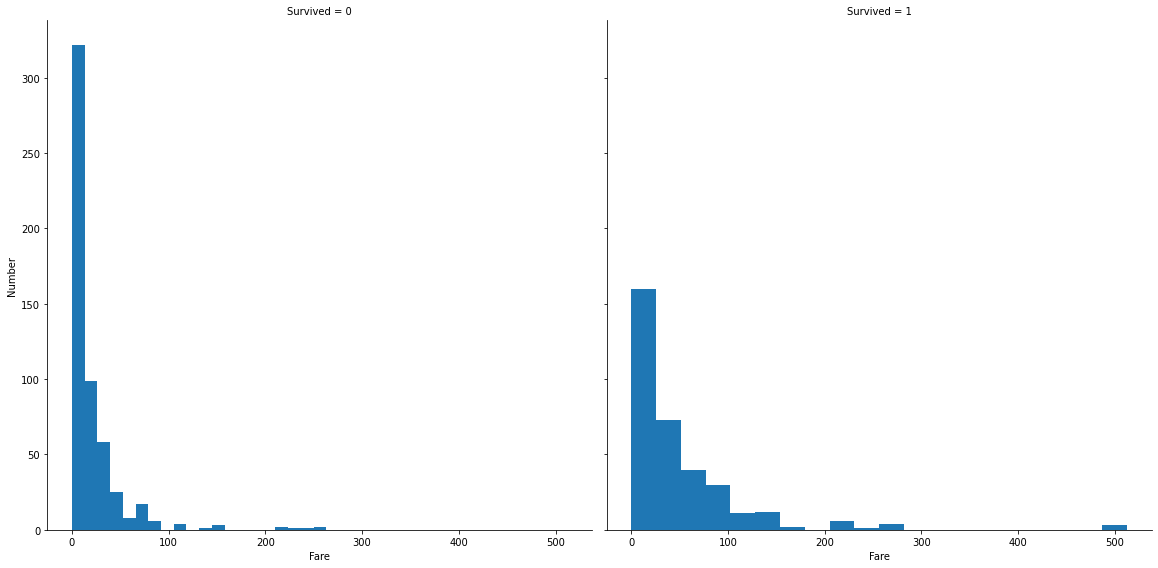

In [19]:
fare_hist = sns.FacetGrid(df, col='Survived',height=8)
fare_hist.map(plt.hist, 'Fare', bins=20)
fare_hist.set_ylabels('Number');

The above two graphs show the relation between the survived and the Fare. Not survived  and the Fare. In the Survived and Fare graph we can see that all the 3 people who bought ticket for more than 500 survived the incident. 303 people who bought the ticket for less than 100 survived i.e 88.5% of the total people survived.
There are 535 people who bought the ticket of less than 100 and could not survive that accounts to 97.5% of the total not survived people.  
Higher fare paying customers had a better survival rate


#Plot a Distplot based on Fare and Survival Rate:

In [56]:
df1=pd.DataFrame(pd.crosstab(df['Survived'] , df['Fare'],margins=True))

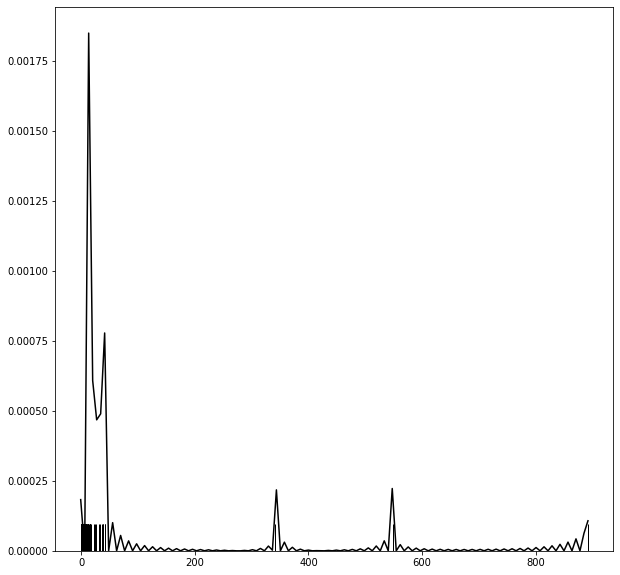

In [61]:
plt.figure(figsize=(10,10))
sns.distplot(df1,rug=True,hist=False,color='black');

##How are "Age" and "Fare" Columns related? Plot a Graph for the same:

Creating age brackets

In [71]:
df['age_bracket']=pd.cut(df['Age'],bins=[0,20,30,40,50,60,70,np.inf],labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80'])


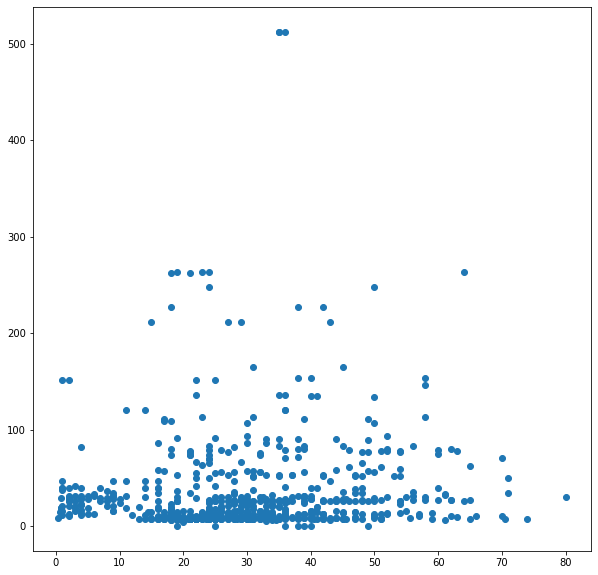

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Fare']);

The above graph shows the distribution between age and Fare. 599 people who bought the ticket for less than 100 are aged less than 50. 

624 people who bought the ticket for less than 200 are aged less than 50.



In [23]:
m=df.groupby('age_bracket')['Fare'].mean()

In [53]:
print(m)

age_bracket
0-20     29.853074
20-30    28.306719
30-40    42.496100
40-50    41.163181
50-60    44.774802
60-70    45.910782
70-80    25.936680
Name: Fare, dtype: float64


The above table shows the mean fare for each age group and the same is represented in the graph below.

The age group of 60-70 has the highest the highest mean that indicates that people of this age have bought a comparitively costlier ticket in comparison to others.

Text(0, 0.5, 'mean fare of the age_bracket')

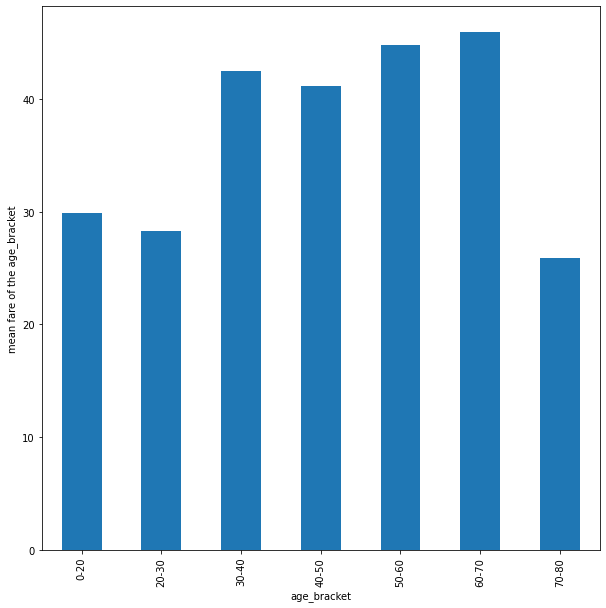

In [62]:
m.plot(kind='bar',figsize=(10,10));
plt.ylabel('mean fare of the age_bracket')

the graph shows the age_bracket and the mean fare in each age_bracket. The age group 60-70 is the group that spends most on the ticket followed by the age group 50-60. The age group of 70+ has mean fare of 25 that indicates that they may have got some senior citizen discount.

#Multivariate Exploration

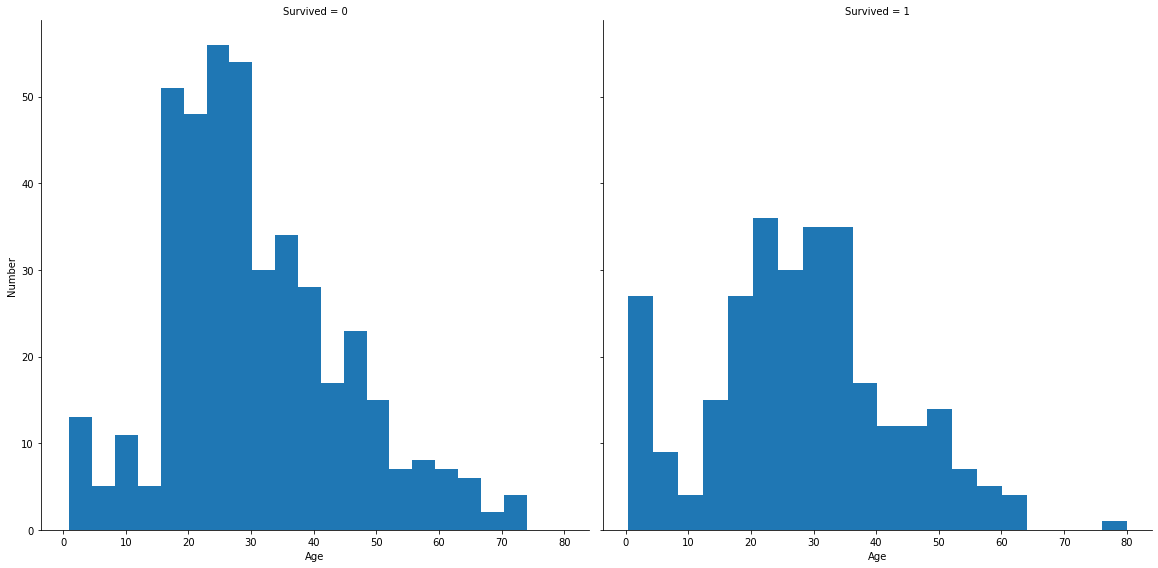

In [25]:

age_hist = sns.FacetGrid(df,col='Survived',height=8)
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

The people between the age of 0-5 have survived in high number, the age between 30-35 has also survived, 20-25 also survived in high number. The age group 20-30 has the highest number or not survived people. 

In [26]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##Does Age have an impact on Survival Rate for each Sex and Class group?

In [75]:
pd.crosstab([df['Survived'],df['age_bracket']],[df['Pclass'],df['Sex']]).T

Survived         0                          ...     1                        
age_bracket   0-20 20-30 30-40 40-50 50-60  ... 30-40 40-50 50-60 60-70 70-80
Pclass Sex                                  ...                              
1      female    1     1     0     1     0  ...    24    12    11     2     0
       male      3    10    12    15    10  ...    13     9     4     0     1
2      female    0     3     1     1     1  ...    16     9     2     0     0
       male      9    33    23     8     9  ...     3     1     0     1     0
3      female   23    16     8     8     0  ...     6     0     0     1     0
       male     61    83    42    20     5  ...     7     2     0     0     0

[6 rows x 14 columns]

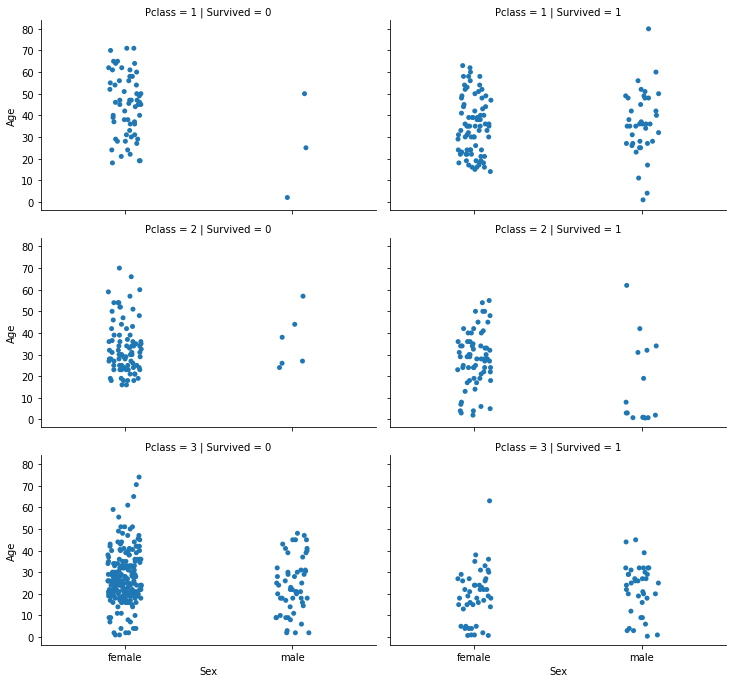

In [64]:
grid = sns.FacetGrid(df, row='Pclass', col='Survived', size=3.2, aspect=1.6)
grid.map(sns.stripplot, 'Sex', 'Age')
grid.add_legend()

The above graph shows that how in each class the age of passengers is affecting survival rate in each class and gender. iF we look at the survived people in all the class, class 1 has most number of survived people.
In class 1 there are 122 males and 94 females out of these females 91 survived, and out of 122 males only 45 survived.

In class 2 there are 108 male passengers and 76 females out of them 70 females survived and 17 males survived.

In class 3 there are 347 males and 144 females out of which 72 females survived and 47 males survived.

From the above numbers it is clear that the least survival rate was seen in class 3 males that is only 13.54% and maximum msurvival rate was seen in class 1 females which is ~96%. One more inference that we can have about the survival rate is that females in all the classes have a much higher survival rate in comparison to the males.

In not survived part in class 1, the most females dies and in class 2, the most number of females died.
Class 3 had the highest number of people but the death rate seems to be quite high in it.


##Plot a HEATMAP showing the correlations between different features:

In [28]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


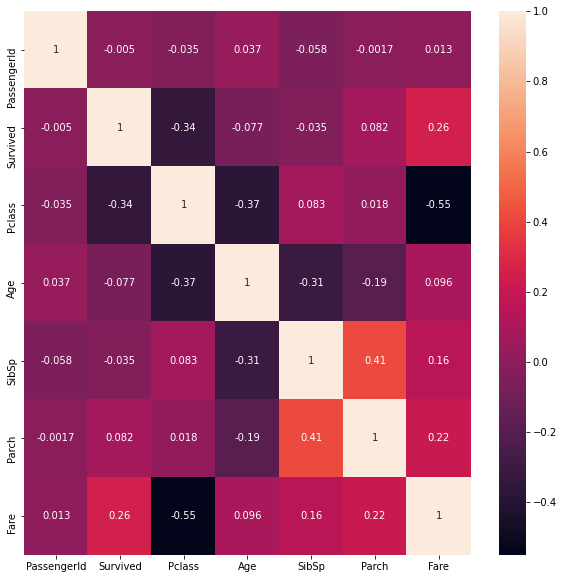

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

As we can see from the above heatmap that there is a negative correlation of -0.55 between Fare and Pclass that indicates that as the Fare increases the class number will decrease that means class 1 will have higher fare.

#Conclusion

The total number of males is given to be 577 out of which only 109 survived that is approximately 18.89% of the males present whereas total number of females presnt were 314 out of which 233 survived which is 74.2%. It can be seen that the percentage of the number of females survived is approximately 4 times than that of men. 
There are 69 children who are below the age of 10 and out of that 38 survived, which accounts to 55% of the children below the age of 10 survived, whereas in total survival rate lis as low as 38.38%.
In class 1 there are a total of 216 people and 136 out of them survived i.e 62.96% people in class 1 survived. In class 2 there are a total of 184 people and 87 out of them survived i.e 47.28%. In class 3 there are a total of 491 people and out of them 119 survived i.e 24.23%. We can see that class 1 people had the highest survival rate and class 3 had the least survival rate.
Class 1 has total of 94 females and out them 91 survived that gives a survival rate of class 1 females to be 96.80%, the total number of males in class 3 is 122 and survived in them is 45 i.e 36.88%.
From the above information we can conclude that it is quite possible that there were not enough life jackets in the ship and that is why some categories like females, children, upperclass are likely to have higher survival rate if compared to others. 

Higher fare paying customers had a better survival rate. 3 people purchased a ticket of more than 300 and all the 3 survived. 20 people bought the ticket of more than 200 and 14 out of them survived i.e 70% survival rate.




